# Turing Deinterleaving Challenge dataset walkthrough

Please ensure all dependencies are installed correctly, a guide for how to do this can be found in README.md

In [8]:
from pathlib import Path

import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from turing_deinterleaving_challenge import (
    Deinterleaver,
    DeinterleavingChallengeDataset,
    PulseTrain,
    download_dataset,
    evaluate_model_on_dataset,
    plot_pulse_train,
    plot_true_vs_predicted_features,
)

Fetching 250 files: 100%|██████████| 250/250 [00:00<00:00, 1517.34it/s]


<Figure size 1200x800 with 0 Axes>

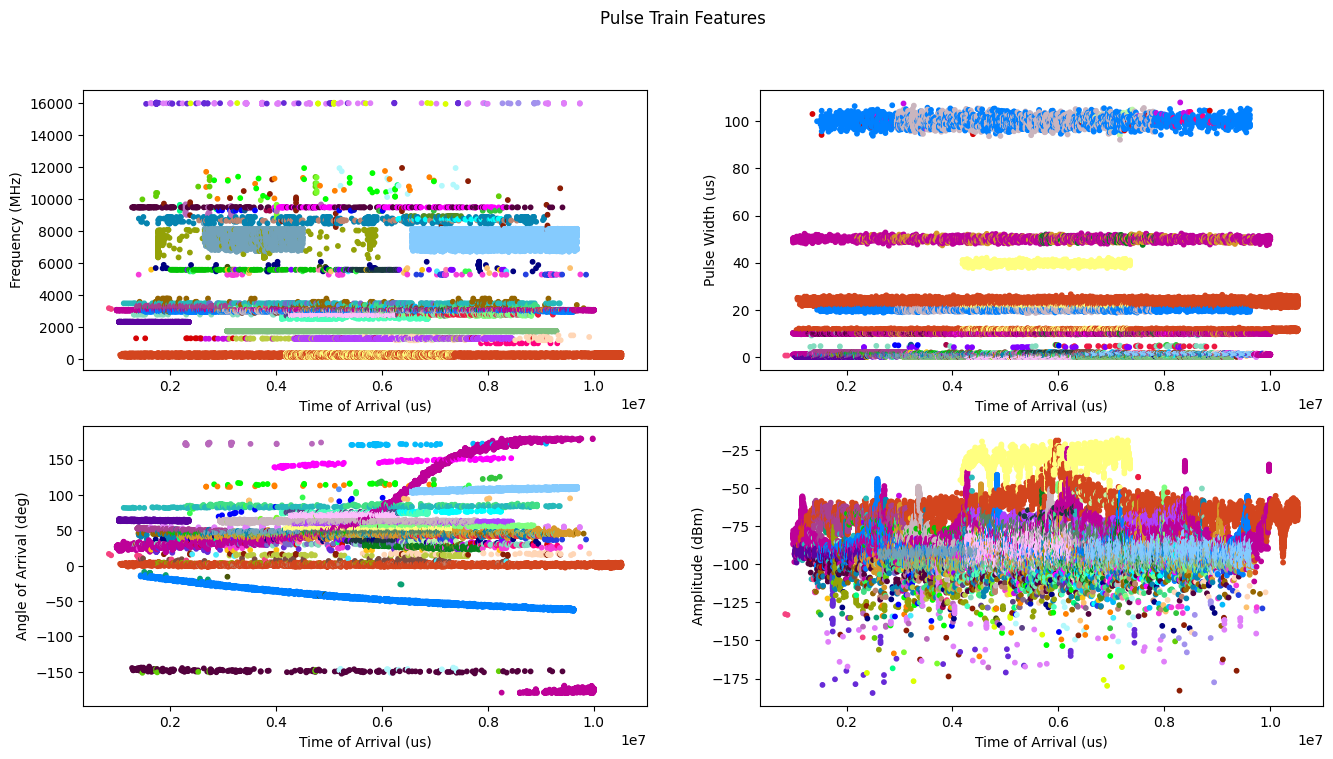

<Figure size 1200x800 with 0 Axes>

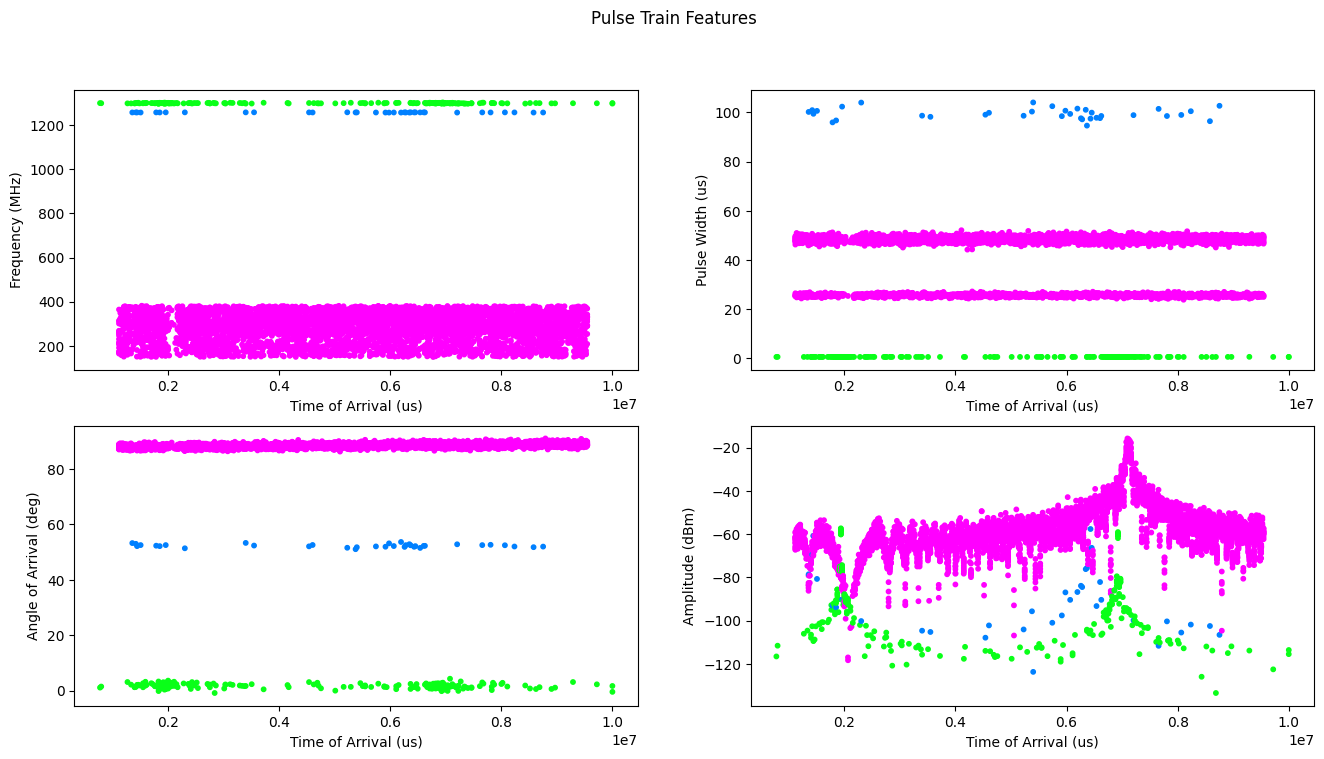

<Figure size 1200x800 with 0 Axes>

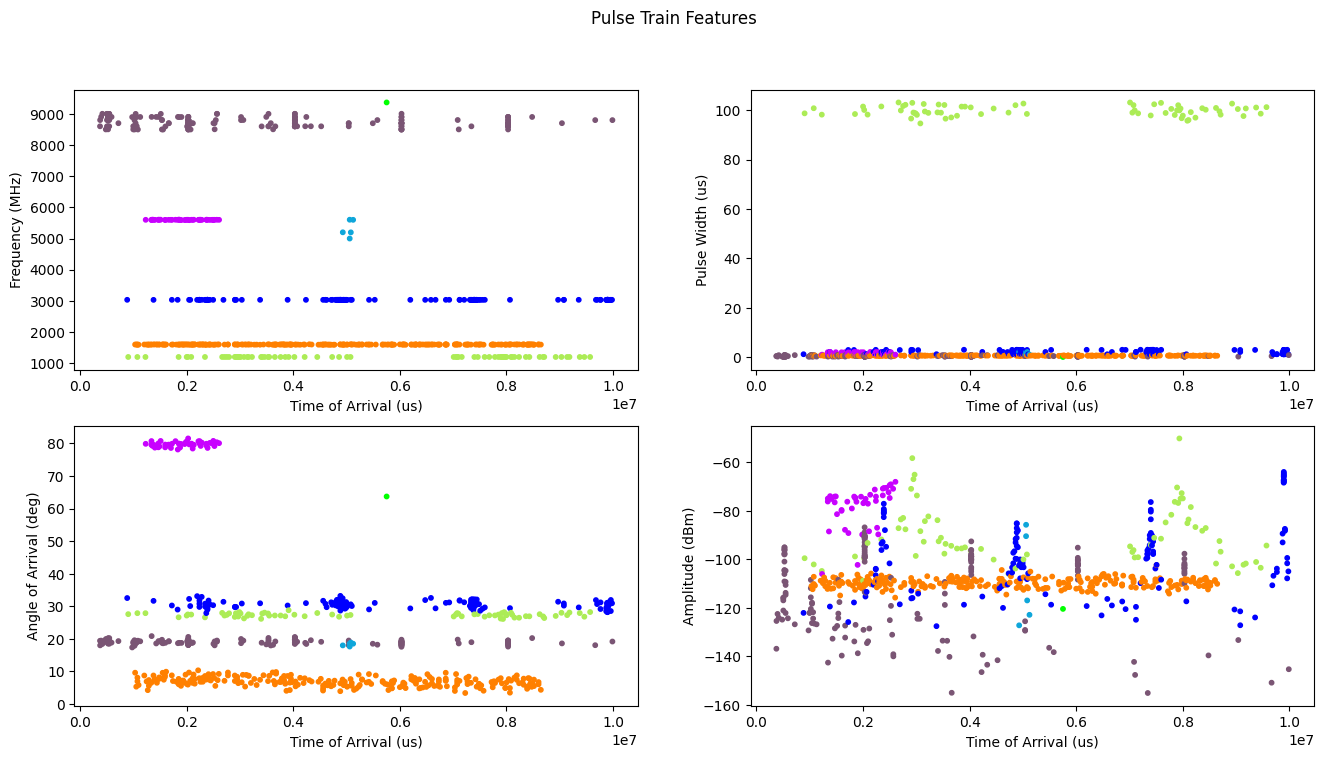

<Figure size 1200x800 with 0 Axes>

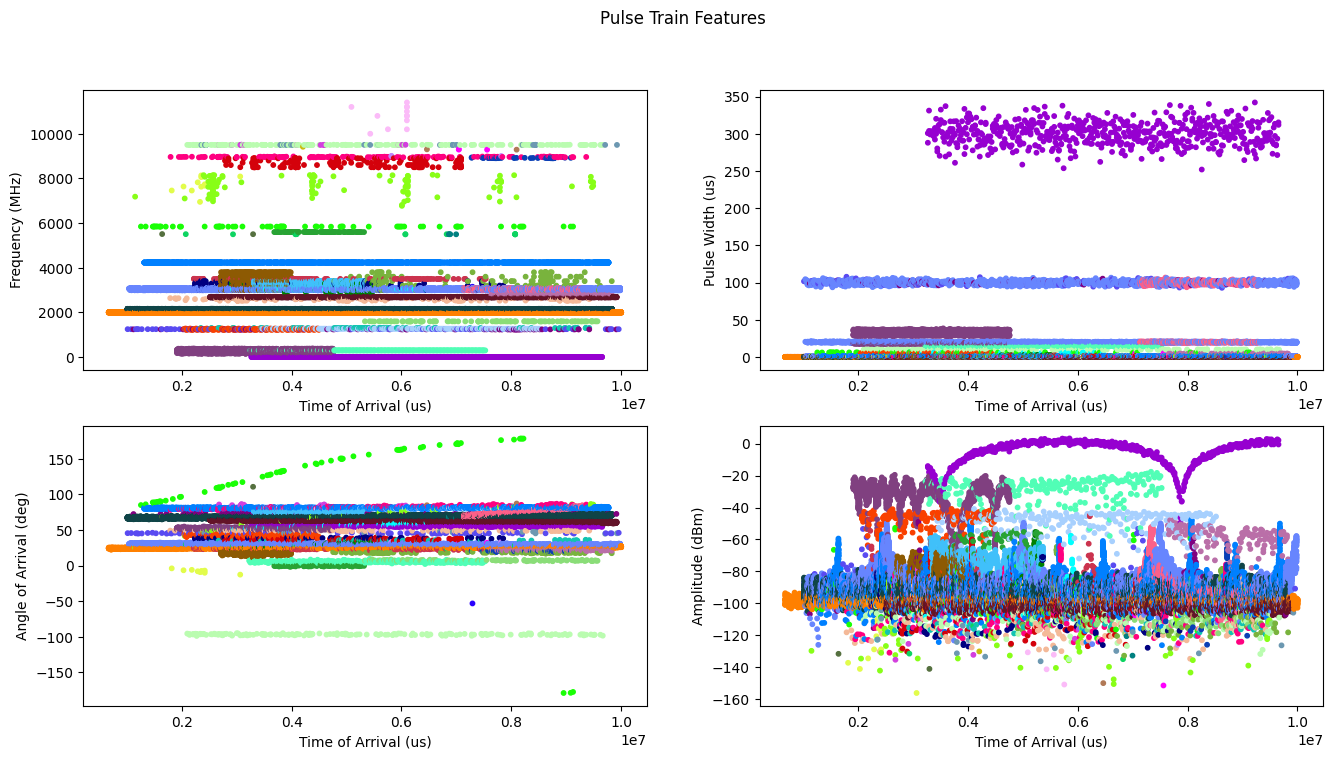

<Figure size 1200x800 with 0 Axes>

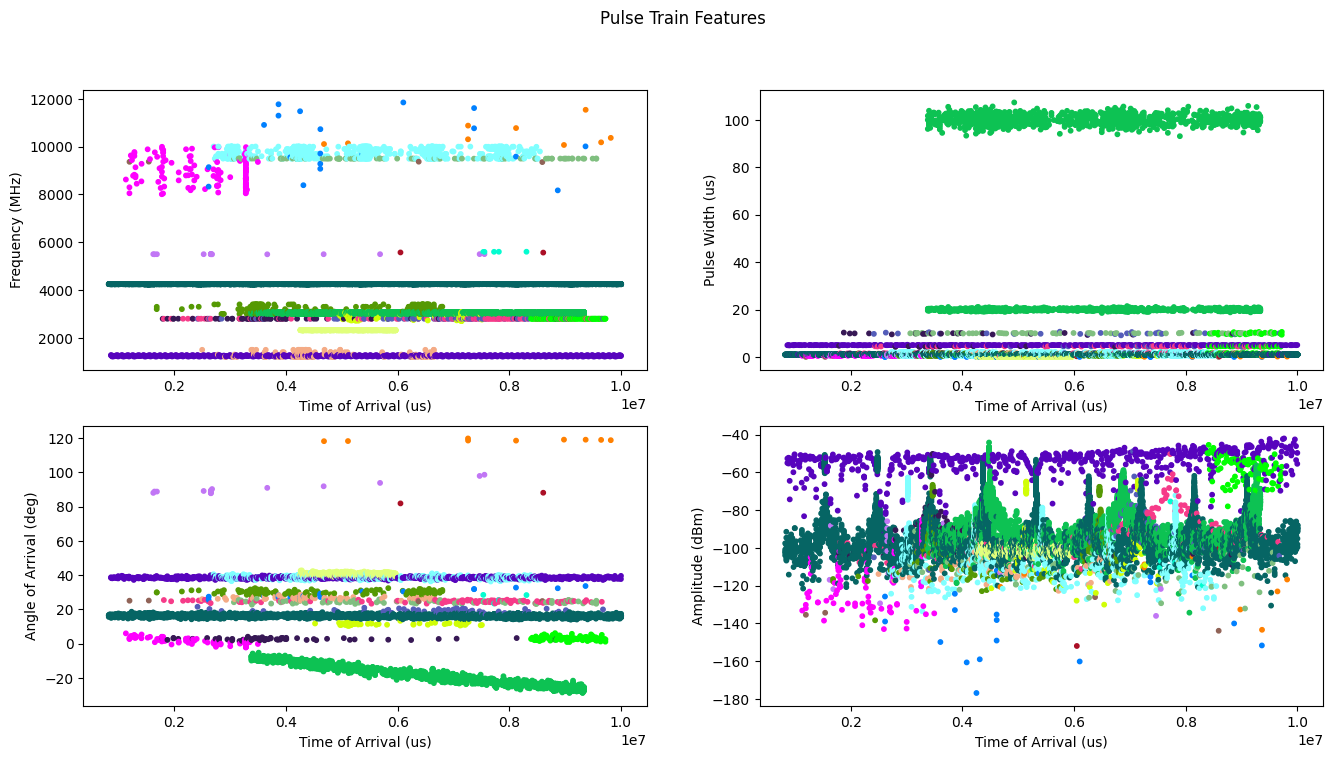

<Figure size 1200x800 with 0 Axes>

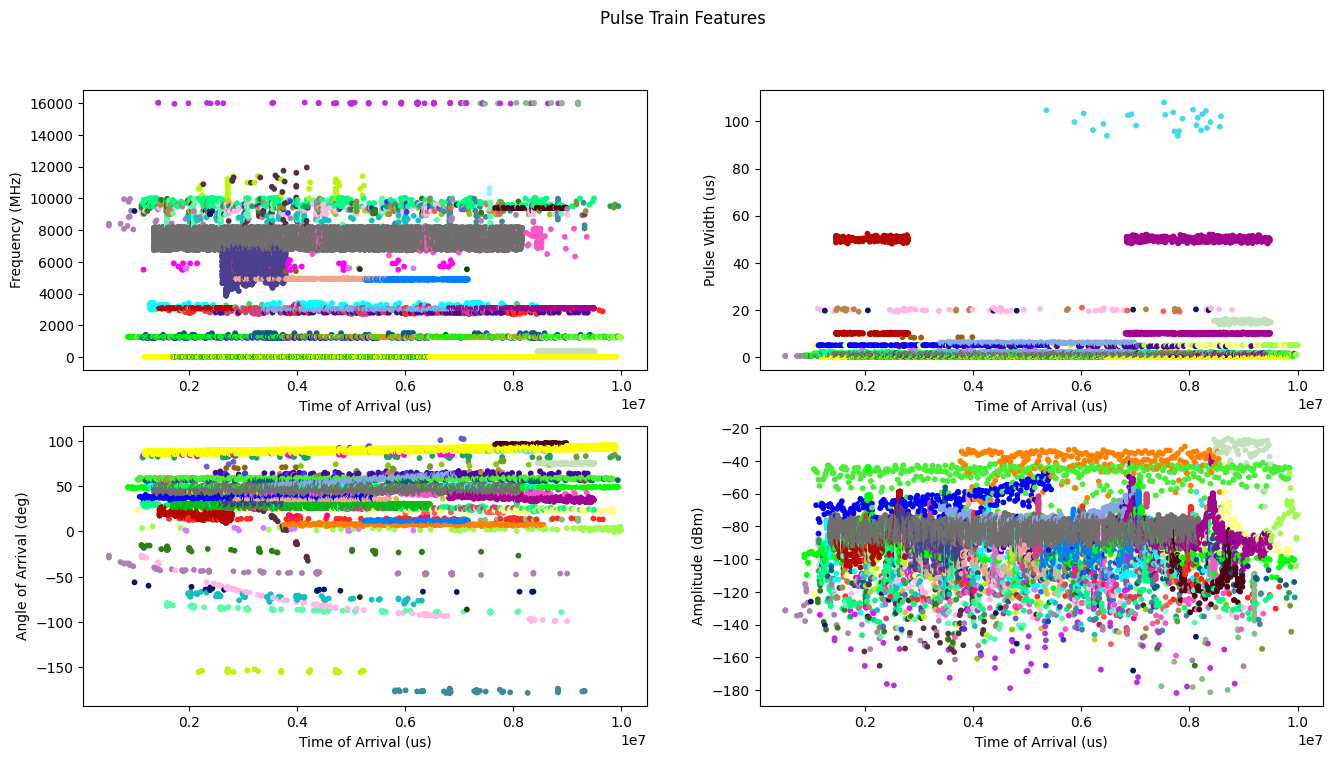

<Figure size 1200x800 with 0 Axes>

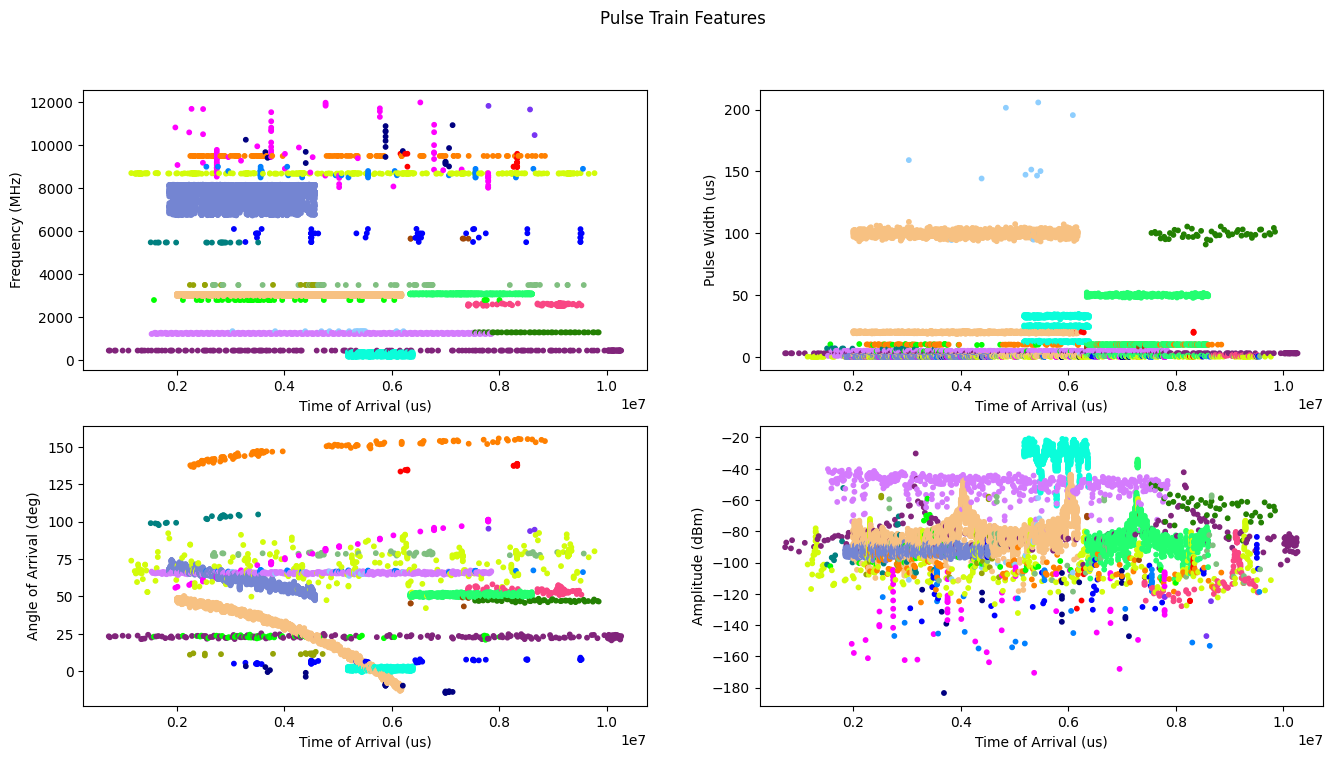

<Figure size 1200x800 with 0 Axes>

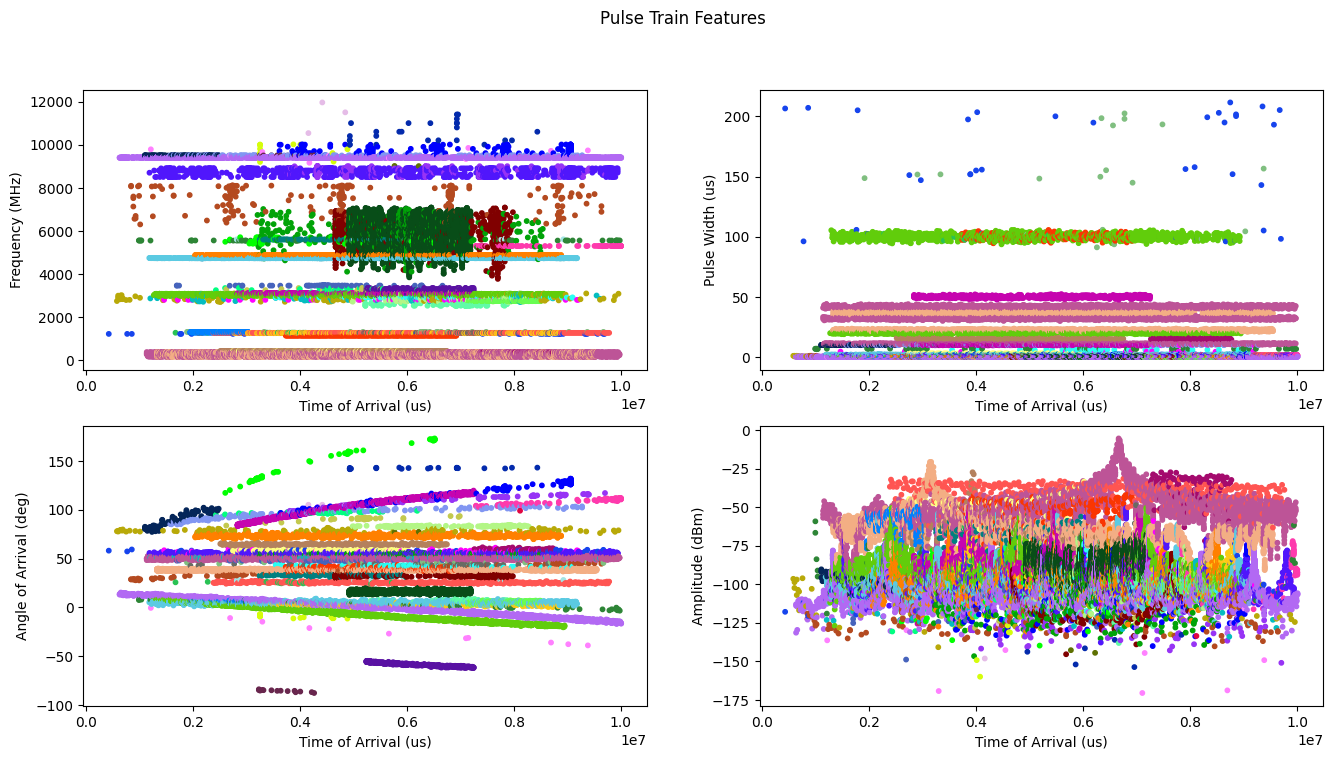

<Figure size 1200x800 with 0 Axes>

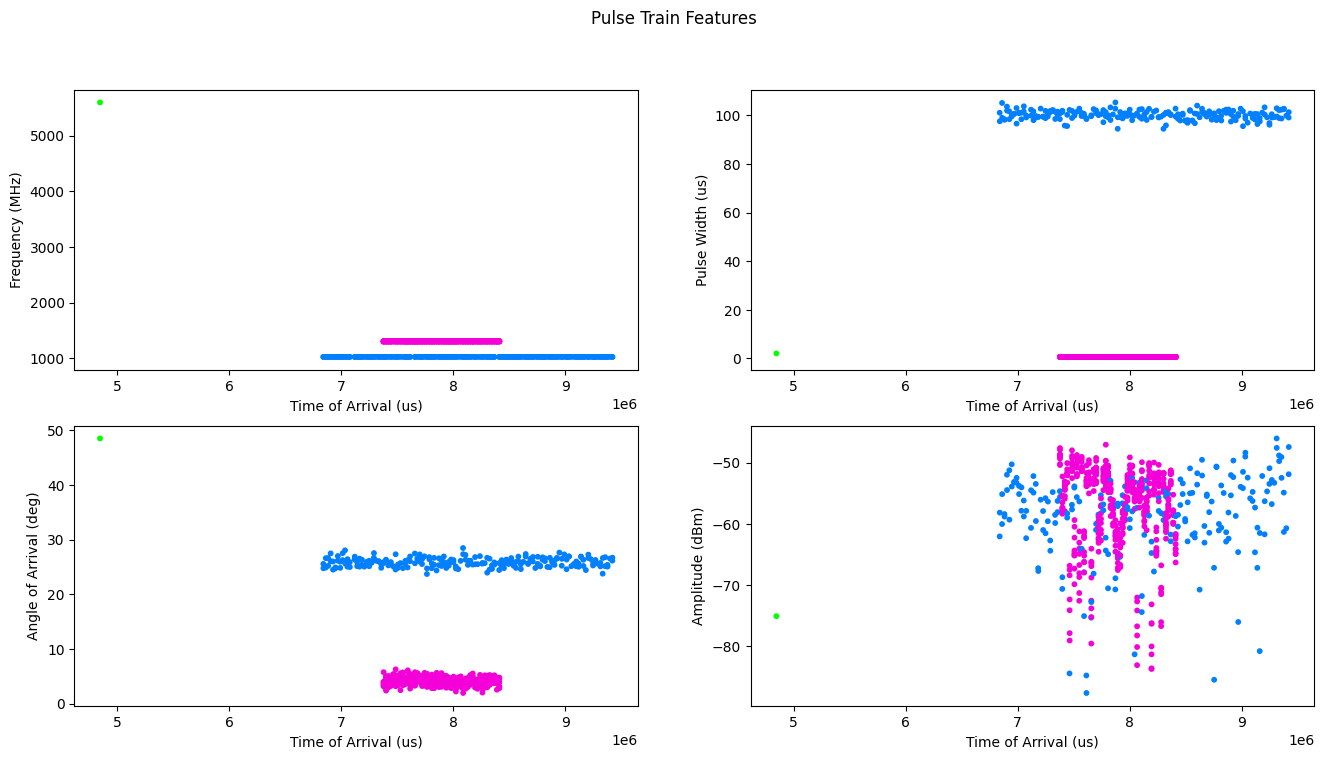

<Figure size 1200x800 with 0 Axes>

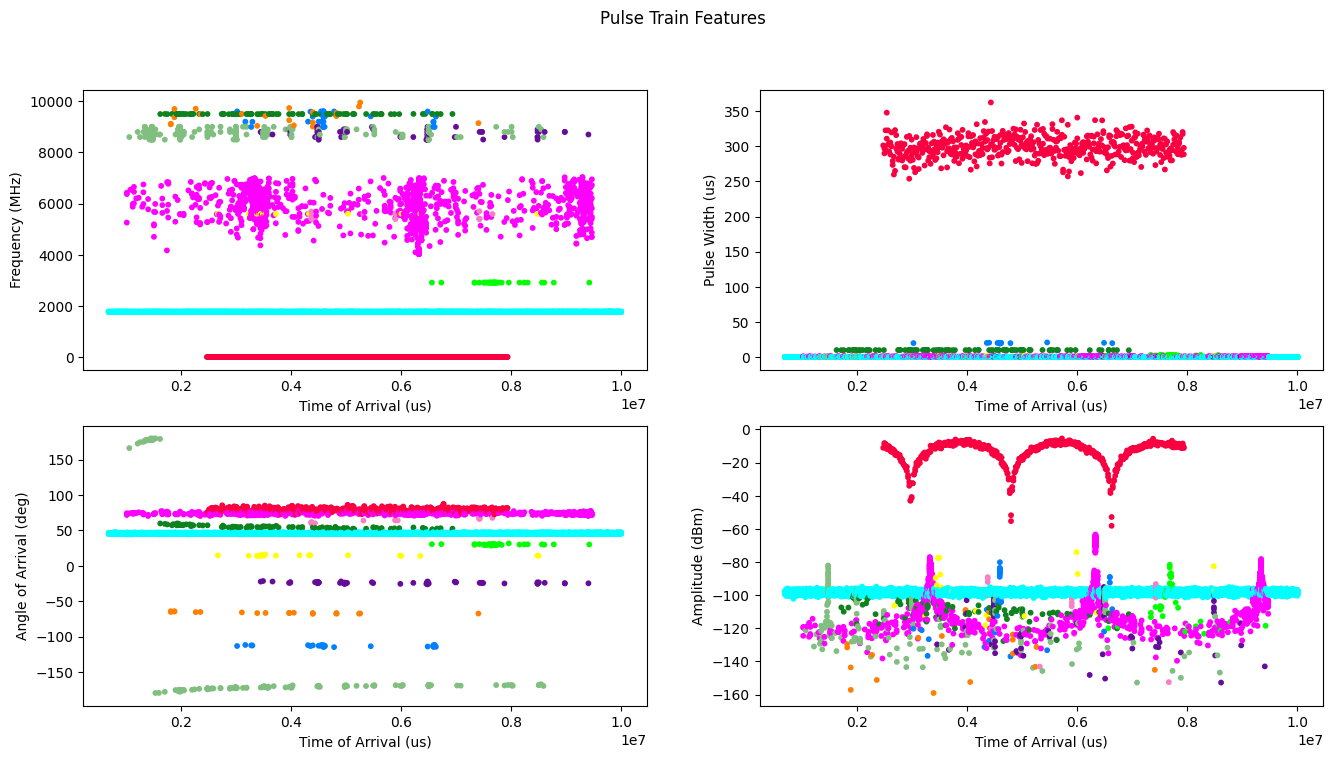

In [2]:
subset = "validation"

save_dir = Path("../data")
train_set_path = download_dataset(
    save_dir=save_dir,
    subsets=subset,
)
train_samples = list((Path(train_set_path) / subset).glob("*.h5"))
for sample in train_samples[:10]:
    train_sample = PulseTrain.load(sample)
    plot_pulse_train(train_sample)



In [3]:
dataset = DeinterleavingChallengeDataset(
    subset=subset, window_length=1000, min_emitters=2
)
print(f"{len(dataset)=}")

Processing files for windows: 100%|██████████| 250/250 [00:03<00:00, 66.42file/s]

len(dataset)=34715


In [ ]:
dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
)

In [5]:
class ClumpDeinterleaver(Deinterleaver):

    def __call__(
            self,
            data # Float[Array, "batch_size seq_len feature_len"]
        ):
        return np.ones(data.shape[:2])

In [6]:
scores = evaluate_model_on_dataset(
    dataloader=dataloader,
    model=ClumpDeinterleaver(),
)
for key, value in scores.items():
    print(f"{key}: {value:.4f}")

Evaluating model:   0%|          | 0/34715 [00:00<?, ?it/s]/Users/egunn/Documents/Code/turing-deinterleaving-challenge/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Evaluating model: 100%|██████████| 34715/34715 [01:37<00:00, 356.90it/s]

Homogeneity: 0.0000
Completeness: 1.0000
V-measure: 0.0000
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000


/Users/egunn/Documents/Code/turing-deinterleaving-challenge/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


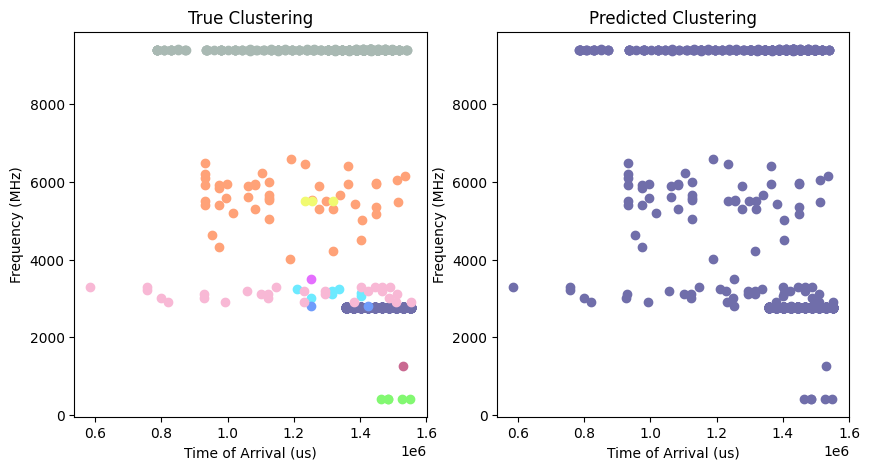

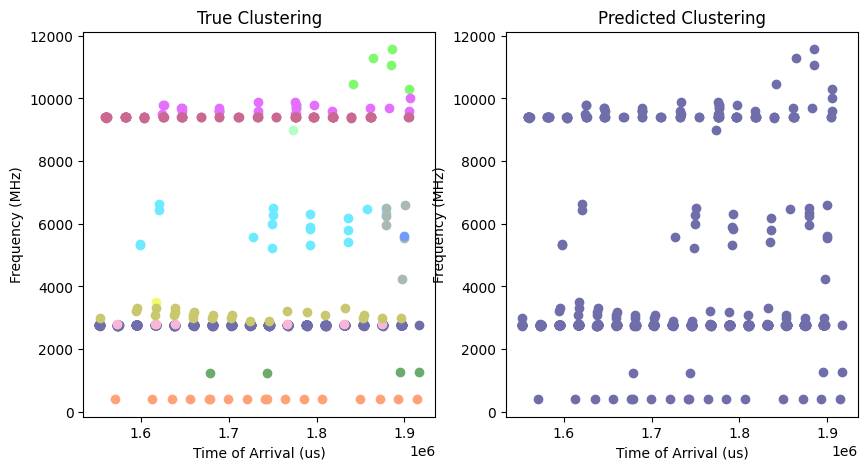

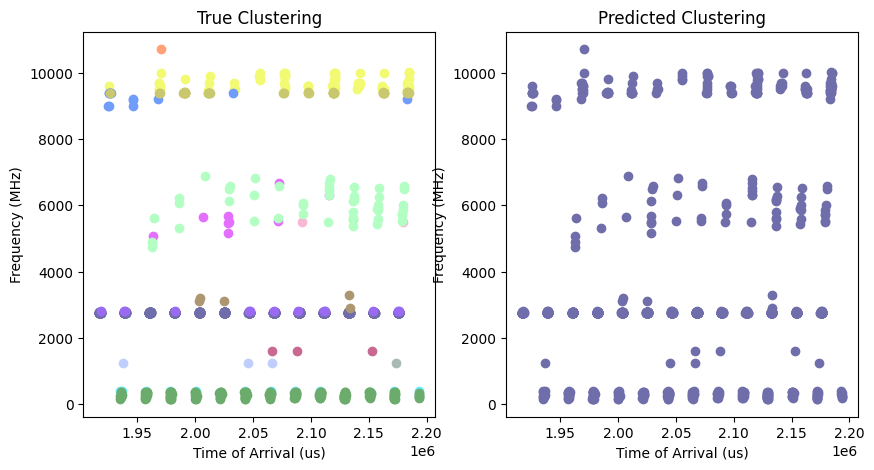

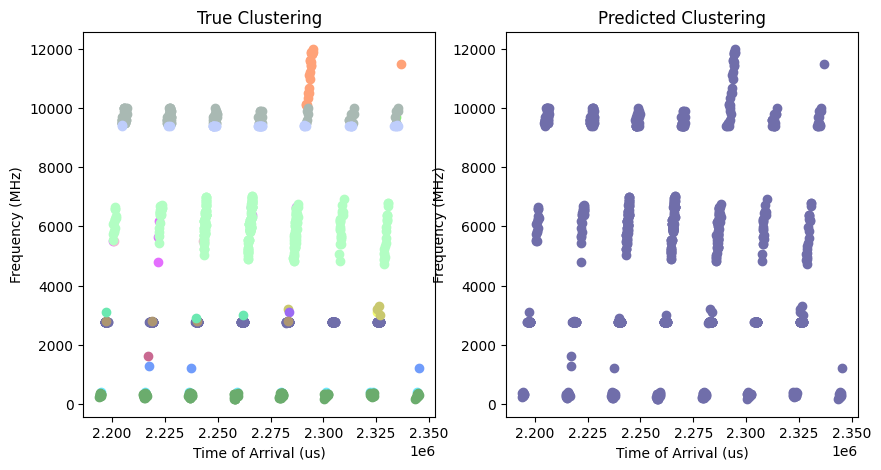

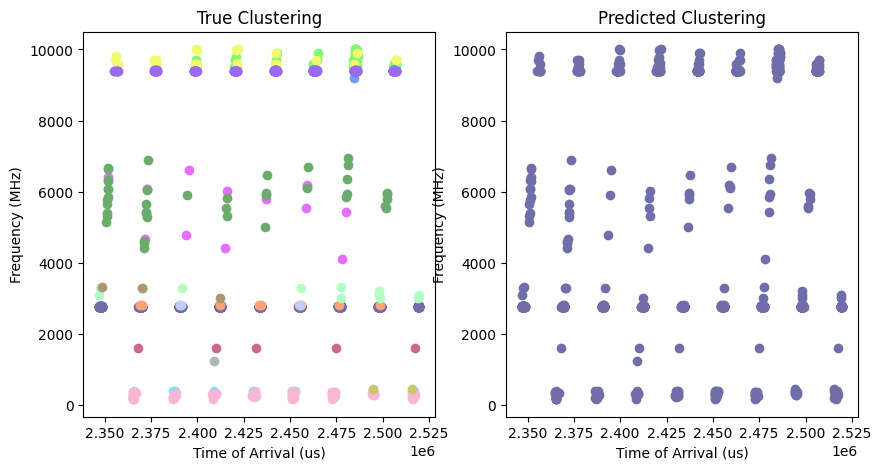

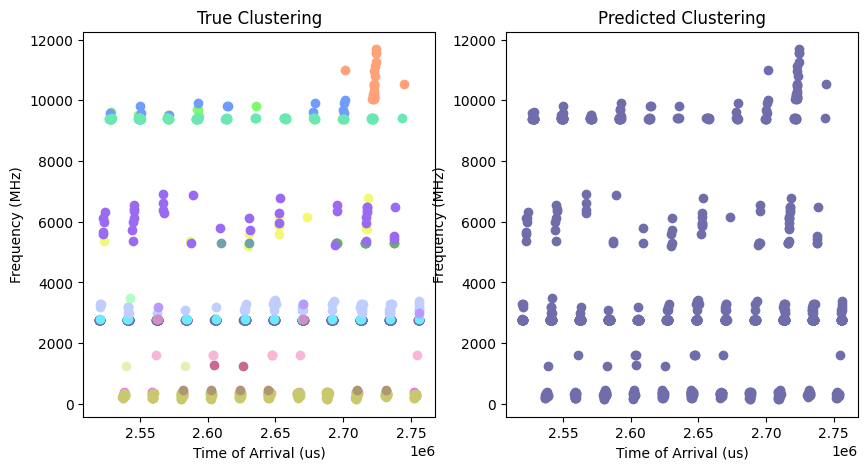

In [ ]:
predictions = []
for i, (data, labels) in enumerate(dataloader):
    data = data.numpy()
    prediction = ClumpDeinterleaver()(data)
    predictions.append((data, prediction, labels.numpy()))
    if i > 5:
        break

for data, prediction, labels in predictions:
    plt.figure(figsize=(10, 5))
    plot_true_vs_predicted_features(
        features=data[:2],
        labels_pred=prediction,
        labels_true=labels,
        x_label="Time of Arrival (us)",
        y_label="Frequency (MHz)",
    )
    plt.show()

